EXO 1

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import imdb

import matplotlib.pyplot as plt
keras.__version__

'2.4.0'

In [2]:
import numpy as np
#We load to dataset with the max number of whords which were asked and separated it into train and test set

(train_data1, train_labels1), (test_data1, test_labels1) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
print(train_data1.shape, train_labels1.shape, test_data1.shape, test_labels1.shape)
#We can see that for now every folds have the same size

(25000,) (25000,) (25000,) (25000,)


EXO 2

In [4]:
#We prepare the data
def vectorize_sequences(sequences, dimension=10000):
  # Create an all-zero matrix of shape (len(sequences), dimension )
  results = np.zeros((len(sequences), dimension)) 
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1. # set specific indices of results[i] to 1s
  return results

# Our vectorized training data
x_train = vectorize_sequences(train_data1)
# Our vectorized test data
x_test = vectorize_sequences(test_data1)
# Our vectorized labels
y_train = np.asarray(train_labels1).astype('float32')
y_test = np.asarray(test_labels1).astype('float32')

In [6]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# We can now see that x_train and x_test are 2-dimension array, 25000 lines and 10000 columns

(25000, 10000) (25000,) (25000, 10000) (25000,)


EXO 3

We build two model to prevent overfitting by create different size of model to see the difference

In [ ]:
original_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu', input_shape=(10000,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')])

original_model.compile(optimizer='rmsprop',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])

EXO 4

In [ ]:
smaller_model = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = 'relu', input_shape=(10000,)),
  tf.keras.layers.Dense(4, activation = 'relu'),
  tf.keras.layers.Dense(1, activation = 'sigmoid')                                  
])

smaller_model.compile(optimizer = 'rmsprop',
                      loss= 'binary_crossentropy',
                       metrics=['acc'])

EXO 5

In [ ]:
original_hist = original_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 55ms/step - loss: 0.5257 - acc: 0.7473 - val_loss: 0.3204 - val_acc: 0.8810
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2522 - acc: 0.9143 - val_loss: 0.2856 - val_acc: 0.8872
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1942 - acc: 0.9313 - val_loss: 0.2962 - val_acc: 0.8810
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1563 - acc: 0.9455 - val_loss: 0.2998 - val_acc: 0.8820
Epoch 5/20
49/49 [==============================] - 2s 43ms/step - loss: 0.1262 - acc: 0.9568 - val_loss: 0.3313 - val_acc: 0.8750
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1101 - acc: 0.9627 - val_loss: 0.3525 - val_acc: 0.8727
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.0906 - acc: 0.9725 - val_loss: 0.3979 - val_acc: 0.8653
Epoch 8/20
49/49 [==============================] - 2s 38ms/step - loss: 0.0750 - a

EXO 6

In [ ]:
smaller_hist = smaller_model.fit(x_train, y_train, epochs = 20, batch_size = 512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 46ms/step - loss: 0.6521 - acc: 0.5977 - val_loss: 0.5825 - val_acc: 0.7164
Epoch 2/20
49/49 [==============================] - 2s 34ms/step - loss: 0.5517 - acc: 0.7667 - val_loss: 0.5322 - val_acc: 0.8176
Epoch 3/20
49/49 [==============================] - 2s 34ms/step - loss: 0.4972 - acc: 0.8436 - val_loss: 0.4994 - val_acc: 0.8254
Epoch 4/20
49/49 [==============================] - 2s 34ms/step - loss: 0.4575 - acc: 0.8784 - val_loss: 0.4750 - val_acc: 0.8516
Epoch 5/20
49/49 [==============================] - 2s 34ms/step - loss: 0.4287 - acc: 0.8988 - val_loss: 0.4567 - val_acc: 0.8687
Epoch 6/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3984 - acc: 0.9159 - val_loss: 0.4473 - val_acc: 0.8644
Epoch 7/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3788 - acc: 0.9298 - val_loss: 0.4360 - val_acc: 0.8748
Epoch 8/20
49/49 [==============================] - 2s 34ms/step - loss: 0.3583 - a

EXO 7

In [ ]:
validate_loss_value_original = original_hist.history['val_loss']
validate_loss_value_smaller = smaller_hist.history['val_loss']

EXO 8

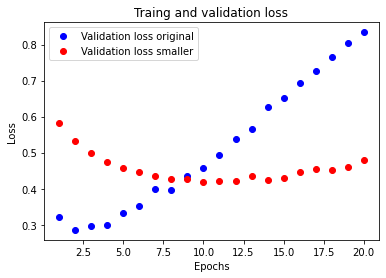

In [ ]:
epochs = range(1, 20 + 1)

plt.plot(epochs, validate_loss_value_original, 'bo', label = 'Validation loss original')
plt.plot(epochs, validate_loss_value_smaller, 'ro', label = 'Validation loss smaller')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

We can see that around 2.5 and 5 epochs, the neural network start to overfit. It's smaller_model that starts overfitting later (2.5 epochs for original and 5 for smaller)

EXO 9

In [ ]:
bigger_model  = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation = 'relu', input_shape=(10000,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')])

bigger_model.compile(optimizer='rmsprop',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])

EXO 10

In [ ]:
bigger_hist = bigger_model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data = (x_test, y_test))

Epoch 1/20
49/49 [==============================] - 17s 343ms/step - loss: 0.5959 - acc: 0.7220 - val_loss: 0.3077 - val_acc: 0.8724
Epoch 2/20
49/49 [==============================] - 16s 322ms/step - loss: 0.2244 - acc: 0.9125 - val_loss: 0.3869 - val_acc: 0.8325
Epoch 3/20
49/49 [==============================] - 16s 320ms/step - loss: 0.1387 - acc: 0.9477 - val_loss: 0.3295 - val_acc: 0.8851
Epoch 4/20
49/49 [==============================] - 16s 320ms/step - loss: 0.0499 - acc: 0.9837 - val_loss: 1.0834 - val_acc: 0.7655
Epoch 5/20
49/49 [==============================] - 16s 319ms/step - loss: 0.0560 - acc: 0.9811 - val_loss: 0.3948 - val_acc: 0.8786
Epoch 6/20
49/49 [==============================] - 16s 320ms/step - loss: 0.0047 - acc: 1.0000 - val_loss: 0.6803 - val_acc: 0.8815
Epoch 7/20
49/49 [==============================] - 16s 322ms/step - loss: 0.0384 - acc: 0.9969 - val_loss: 0.6023 - val_acc: 0.8780
Epoch 8/20
49/49 [==============================] - 16s 321ms/step - 

EXO 11

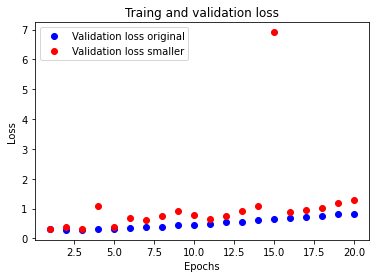

In [ ]:
validate_loss_value_bigger = bigger_hist.history['val_loss']
plt.plot(epochs, validate_loss_value_original, 'bo', label = 'Validation loss original')
plt.plot(epochs, validate_loss_value_bigger, 'ro', label = 'Validation loss bigger')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# We can see that the val loss is close to zero at the beginning but doesn't decrease at all after that, it just
#keep increasing
#Lets go work on weight regularization

EXO 12

In [ ]:
l2_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16,  kernel_regularizer= keras.regularizers.l1_l2(l1=0.001, l2=0.001),activation = 'relu', input_shape=(10000,)),
    tf.keras.layers.Dense(16,  kernel_regularizer= keras.regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')])

l2_model.compile(optimizer='rmsprop',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])

EXO 13

In [ ]:
l2_hist = l2_model.fit(x_train, y_train, epochs = 20, batch_size = 512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 47ms/step - loss: 1.3348 - acc: 0.7017 - val_loss: 0.6670 - val_acc: 0.8513
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.6473 - acc: 0.8533 - val_loss: 0.6105 - val_acc: 0.8576
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.6018 - acc: 0.8579 - val_loss: 0.5889 - val_acc: 0.8608
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.5740 - acc: 0.8626 - val_loss: 0.5605 - val_acc: 0.8686
Epoch 5/20
49/49 [==============================] - 2s 37ms/step - loss: 0.5641 - acc: 0.8650 - val_loss: 0.5462 - val_acc: 0.8697
Epoch 6/20
49/49 [==============================] - 2s 38ms/step - loss: 0.5408 - acc: 0.8719 - val_loss: 0.5383 - val_acc: 0.8709
Epoch 7/20
49/49 [==============================] - 2s 39ms/step - loss: 0.5331 - acc: 0.8710 - val_loss: 0.5396 - val_acc: 0.8695
Epoch 8/20
49/49 [==============================] - 2s 38ms/step - loss: 0.5178 - a

EXO 14

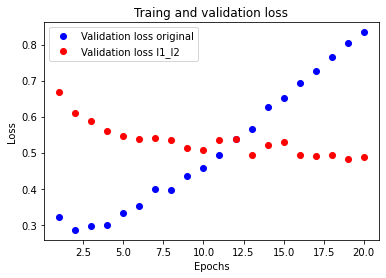

In [ ]:
validate_loss_value_l2 = l2_hist.history['val_loss']
plt.plot(epochs, validate_loss_value_original, 'bo', label = 'Validation loss original')
plt.plot(epochs, validate_loss_value_l2, 'ro', label = 'Validation loss l1_l2')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#Indeed we can see that the slope of the validation loss is less important
#After several tentative, the l1_l2 is the best regularizater. 

EXO 15

In [ ]:
dpt_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'relu', input_shape=(10000,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation = 'sigmoid')])

dpt_model.compile(optimizer='rmsprop',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])

EXO 16

In [ ]:
dpt_hist = dpt_model.fit(x_train, y_train, epochs = 20, batch_size = 512, validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 49ms/step - loss: 0.6352 - acc: 0.6249 - val_loss: 0.4199 - val_acc: 0.8668
Epoch 2/20
49/49 [==============================] - 2s 39ms/step - loss: 0.4517 - acc: 0.8077 - val_loss: 0.3231 - val_acc: 0.8833
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.3570 - acc: 0.8629 - val_loss: 0.2895 - val_acc: 0.8858
Epoch 4/20
49/49 [==============================] - 2s 41ms/step - loss: 0.2979 - acc: 0.8950 - val_loss: 0.2781 - val_acc: 0.8878
Epoch 5/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2583 - acc: 0.9108 - val_loss: 0.2819 - val_acc: 0.8863
Epoch 6/20
49/49 [==============================] - 2s 40ms/step - loss: 0.2240 - acc: 0.9217 - val_loss: 0.2930 - val_acc: 0.8875
Epoch 7/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2054 - acc: 0.9344 - val_loss: 0.3147 - val_acc: 0.8852
Epoch 8/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1822 - a

EXO 17

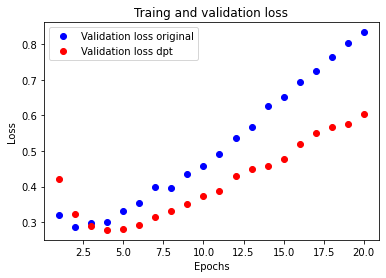

In [ ]:
validate_loss_value_dpt = dpt_hist.history['val_loss']
plt.plot(epochs, validate_loss_value_original, 'bo', label = 'Validation loss original')
plt.plot(epochs, validate_loss_value_dpt, 'ro', label = 'Validation loss dpt')
plt.title('Traing and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
#We can see an improvement, but it's far less important than the improvement from regularizater

# Second part

EXO 1

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception: 
  pass
from keras.datasets import boston_housing

In [ ]:
(train_data , train_targets), (test_data , test_targets) = boston_housing.load_data()

In [ ]:
print(train_data.shape, train_targets.shape, test_data.shape, test_targets.shape)

(404, 13) (404,) (102, 13) (102,)


EXO 2

In [ ]:
mean_train = train_data.mean(axis=0)
std_train = train_data.std(axis=0)
train_data = (train_data - mean_train)/std_train
mean_test = test_data.mean(axis=0)
std_test = test_data.std(axis=0)
test_data = (test_data - mean_test)/std_test

EXO 3

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
  model = Sequential()
  model.add(Dense(64, activation = 'relu',input_shape=(train_data.shape[1],)))
  model.add(Dense(64, activation = 'relu'))
  model.add(Dense(1))
  model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
  return model

EXO 4

In [ ]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=1) 
  all_scores.append(val_mae)

processing fold # 0
4/4 [==============================] - 0s 2ms/step - loss: 10.5243 - mae: 2.6787
processing fold # 1
4/4 [==============================] - 0s 3ms/step - loss: 13.7055 - mae: 2.4746
processing fold # 2
4/4 [==============================] - 0s 2ms/step - loss: 15.4806 - mae: 2.6832
processing fold # 3
4/4 [==============================] - 0s 2ms/step - loss: 11.2696 - mae: 2.3273


EXO 5

In [ ]:
print(all_scores)
np.mean(all_scores)

[2.6786892414093018, 2.474616527557373, 2.683213710784912, 2.327258586883545]


2.540944516658783

EXO 6

In [ ]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  print(mae_history)
  all_mae_histories.append(mae_history)

processing fold # 0
[3.7996773719787598, 2.8682305812835693, 2.62209415435791, 2.431342124938965, 2.332124710083008, 2.1613264083862305, 2.3559951782226562, 2.211047649383545, 2.0653908252716064, 2.0669994354248047, 2.0061047077178955, 1.9188661575317383, 2.0369598865509033, 2.013873338699341, 2.0454213619232178, 1.9597508907318115, 1.9461750984191895, 1.9405591487884521, 1.7613303661346436, 1.9914867877960205, 2.2048935890197754, 1.9291508197784424, 2.3510069847106934, 2.061508893966675, 2.1067557334899902, 2.0109734535217285, 1.8809139728546143, 1.7991359233856201, 2.1767377853393555, 2.008347988128662, 1.976534366607666, 2.05959153175354, 1.9981701374053955, 1.899621844291687, 2.2688565254211426, 2.2826969623565674, 1.9466432332992554, 1.964754343032837, 1.894934058189392, 1.747059941291809, 1.8682007789611816, 1.7430167198181152, 1.9749648571014404, 2.179401159286499, 2.039655923843384, 2.0628461837768555, 1.7974838018417358, 1.7422062158584595, 1.9271149635314941, 1.87556052207946

EXO 7

Average mae score per epoch

In [ ]:
average_mae_history = []
for i in range(num_epochs):
  calc=0
  for j in range(k):
    calc += all_mae_histories[j][i]
  calc = calc / k
  average_mae_history.append(calc)

In [ ]:
average_mae_history

[4.560758948326111,
 3.381118357181549,
 3.003088116645813,
 2.7684118151664734,
 2.6128467321395874,
 2.5982943773269653,
 2.662862539291382,
 2.5944931507110596,
 2.5833524465560913,
 2.485955536365509,
 2.5228257179260254,
 2.4866644144058228,
 2.461032450199127,
 2.5523828864097595,
 2.4983651638031006,
 2.4335710406303406,
 2.3821000456809998,
 2.4900171160697937,
 2.3972561359405518,
 2.439971923828125,
 2.4693286418914795,
 2.4117300510406494,
 2.546730160713196,
 2.5171236991882324,
 2.4924046993255615,
 2.4362834692001343,
 2.4876771569252014,
 2.5522778630256653,
 2.4912627935409546,
 2.4601866006851196,
 2.4184490442276,
 2.4559816122055054,
 2.3675137758255005,
 2.3228451907634735,
 2.4496443271636963,
 2.4955469965934753,
 2.465038448572159,
 2.397400140762329,
 2.4635888040065765,
 2.476989656686783,
 2.4188698530197144,
 2.391375184059143,
 2.4657708406448364,
 2.431706130504608,
 2.4276669025421143,
 2.613598585128784,
 2.350003808736801,
 2.4635564982891083,
 2.4686597

EXO 8


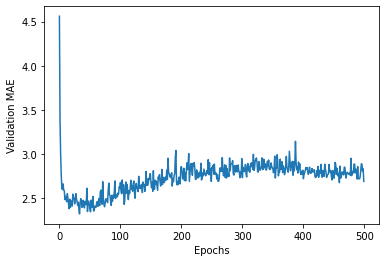

In [ ]:
plt.plot(range(0, len(average_mae_history) ), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

EXO 9

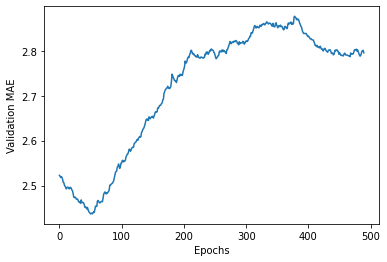

In [ ]:
#First we work on the smooth part : 
def smooth_curve(points, factor):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points


plt.plot(range(len(smooth_curve(average_mae_history[10:],0.95))), smooth_curve(average_mae_history[10:],0.95))
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Stop improving around 50th epochs

processing fold # 0
[3.0489139556884766, 3.1731467247009277, 2.766202688217163, 2.61627197265625, 2.307302713394165, 2.2524056434631348, 2.2006261348724365, 2.218327522277832, 2.189159870147705, 2.1171059608459473, 2.0966107845306396, 2.054225206375122, 2.2196812629699707, 2.2727437019348145, 2.0836732387542725, 2.1742608547210693, 2.2602200508117676, 2.078798532485962, 2.3539507389068604, 1.920812964439392, 2.1846814155578613, 2.0728673934936523, 2.1063008308410645, 1.9489917755126953, 2.2882895469665527, 2.6972460746765137, 2.2900021076202393, 2.0543854236602783, 1.9312350749969482, 1.912490725517273, 1.9682567119598389, 2.2377676963806152, 2.375248670578003, 1.8784433603286743, 2.2290947437286377, 2.2840404510498047, 2.1323628425598145, 1.9753193855285645, 2.0323495864868164, 1.9847960472106934, 2.308551549911499, 1.9535713195800781, 1.9598926305770874, 2.097071647644043, 2.2841174602508545, 2.148261070251465, 2.5902256965637207, 2.1299476623535156, 2.1702284812927246, 2.44925165176

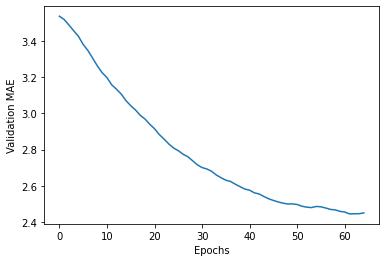

In [ ]:
#Tuning part
def build_model2():
  model = Sequential()
  model.add(Dense(128, activation = 'relu',input_shape=(train_data.shape[1],)))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dense(1))
  model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
  return model

k = 4
num_val_samples = len(train_data) // k
num_epochs = 65
all_mae_histories = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
  partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
  model = build_model2()
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
  mae_history = history.history['val_mae']
  print(mae_history)
  all_mae_histories.append(mae_history)

average_mae_history = []
for i in range(num_epochs):
  calc=0
  for j in range(k):
    calc += all_mae_histories[j][i]
  calc = calc / k
  average_mae_history.append(calc)

plt.plot(range(len(smooth_curve(average_mae_history,0.95))), smooth_curve(average_mae_history,0.95))
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

Epoch 1/65
13/13 [==============================] - 1s 14ms/step - loss: 483.2933 - mae: 20.1753 - val_loss: 382.7542 - val_mae: 17.4290
Epoch 2/65
13/13 [==============================] - 0s 5ms/step - loss: 289.8310 - mae: 15.0428 - val_loss: 194.5110 - val_mae: 12.0360
Epoch 3/65
13/13 [==============================] - 0s 4ms/step - loss: 139.5492 - mae: 9.5869 - val_loss: 91.7089 - val_mae: 8.0542
Epoch 4/65
13/13 [==============================] - 0s 5ms/step - loss: 72.0865 - mae: 6.3831 - val_loss: 55.6506 - val_mae: 5.9440
Epoch 5/65
13/13 [==============================] - 0s 4ms/step - loss: 39.6036 - mae: 4.8209 - val_loss: 37.0007 - val_mae: 4.7244
Epoch 6/65
13/13 [==============================] - 0s 5ms/step - loss: 32.1399 - mae: 4.0099 - val_loss: 30.1113 - val_mae: 4.1398
Epoch 7/65
13/13 [==============================] - 0s 4ms/step - loss: 23.8409 - mae: 3.4639 - val_loss: 26.8590 - val_mae: 3.8301
Epoch 8/65
13/13 [==============================] - 0s 5ms/step - 

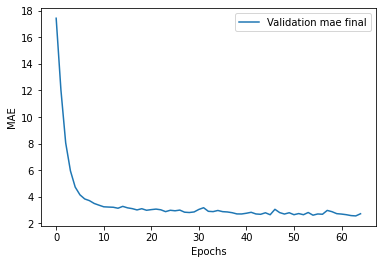

In [ ]:
#Test part
model = build_model2()
history = model.fit(train_data, train_targets, validation_data=(test_data, test_targets), epochs=num_epochs)
validate_loss_value_dpt = history.history['val_mae']
plt.plot(range(num_epochs), validate_loss_value_dpt, label = 'Validation mae final')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()